In [1]:
import os 
import pandas as pd
import re 
import string
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import seaborn as sns

In [2]:
data = pd.read_csv('twitter.csv', encoding='utf-8')
train_data = pd.read_csv('train.csv', encoding='utf-8')
print(f"Number of data points: data : {data.shape[0]}, train : {train_data.shape[0]}",'\n')

Number of data points: data : 40, train : 5970 



In [3]:
data.head()

,tweet
0,I've watched episode S01E01 of The Mandalorian...
1,I'm not even a Star Wars fan but I'm out here ...
2,We watching The #Mandalorian these days
3,Getting gnarly #workinprogress #mandalorian p...
4,Am I the only one who finds baby Yoda kinda cr...


In [4]:
train_data = train_data[['Category', 'Tweet']]
train_data.rename(columns={'Category': 'emotion'}, inplace=True)
train_data = train_data[train_data['emotion'] != 'Tweet']
train_data

,emotion,Tweet
0,negative,Not Available
1,neutral,IOS 9 App Transport Security. Mm need to check...
2,neutral,"Mar if you have an iOS device, you should down..."
3,negative,@jimmie_vanagon my phone does not run on lates...
4,positive,Not sure how to start your publication on iOS?...
...,...,...
5965,neutral,@YouAreMyArsenal Wouldn't surprise me if we en...
5966,neutral,Rib injury for Zlatan against Russia is a big ...
5967,neutral,Noooooo! I was hoping to see Zlatan being Zlat...
5968,neutral,Not Available


## Count Train 

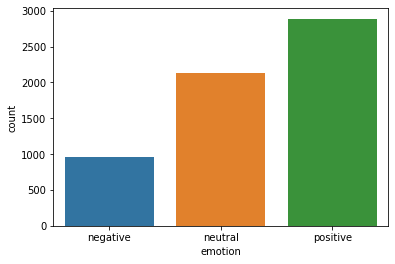

In [15]:
sns.countplot(x='emotion',data=train_data)

In [21]:
# remove the tweets which contains Not available
train_data = train_data[train_data['Tweet'] != "Not Available"]
train_data

,emotion,Tweet
1,neutral,ios app transpo security mm need check rd pay ...
2,neutral,mar ios device download app
3,negative,jimmievanagon phone run latest ios may aount p...
4,positive,sure sta publication ios well live helping ask...
5,neutral,two dollar tuesday forklift quickkey ios suite...
...,...,...
5963,positive,ok ed lets zlatan greizmann lapoe tomorrow mak...
5964,neutral,goal level zlatan k friday posting every day v...
5965,neutral,youaremyarsenal wouldnt surprise enquiredhe ca...
5966,neutral,rib injury zlatan russia big blow misses austr...


## Preprocess

In [5]:
def Clean(dataframe):
    #Remove non ASCII characters:
    dataframe = dataframe.encode('ascii','ignore')
    dataframe = dataframe.decode('utf8')
    
    #Remove URLs : 
    dataframe = re.sub('http\S+\s*','',dataframe)  
    
    
    #removing mentions:
    dataframe = re.sub('rt|cc','',dataframe) #Remove RT and cc
    dataframe = re.sub('#\S+','',dataframe) #Remove hashtags
    
    dataframe = dataframe.lower() #Converting to lowercase
    dataframe = re.sub(r'\d+', '', dataframe) #Removing numbers
    dataframe = re.sub(r'[^a-zA-Z0-9\s]', '', dataframe) #Removing punctuations
    dataframe = dataframe.strip() #remove white spaces
    dataframe = re.sub('pictw\S+\s*','',dataframe)
    
    #Tokenize: 
    word_tokens = word_tokenize(dataframe)
    
    #Words stops
    stop_words=set(stopwords.words('english'))

    filtered_tweet = []
    filtered_tweet = [w for w in word_tokens if not w in stop_words]
     
    return ' '.join(filtered_tweet)

## Clean data input 

In [26]:
data_clean = data.apply(Clean)
data_clean

0                    ive watched episode se mandalorian
1     im even star wars fan im showing folks pic lik...
2                                         watching days
3                                        getting gnarly
4                      one finds baby yoda kinda creepy
5                    ive watched episode se mandalorian
6                             staed something new today
7                                       way mandalorian
8                                                  baby
9     jango n boba deserve recognized da reason da m...
10                              introduced little cutie
11    hey look iratheanimator animated charming walk...
12    junping mandalorianhelmetbuilt bandwagon chinb...
13    one thinks dr pershing looks like michael odon...
14    life good stop bullshit im done politics tryin...
15                    theme music stas ish lowkey slaps
16    wellginacarano cara dune im love cant wait nex...
17                                  getting caug

## Clean data train 

In [23]:
train_data_clean = train_data['Tweet'].apply(Clean)

In [25]:
train_data_clean

1       ios app transpo security mm need check rd pay ...
2                             mar ios device download app
3       jimmievanagon phone run latest ios may aount p...
4       sure sta publication ios well live helping ask...
5       two dollar tuesday forklift quickkey ios suite...
                              ...                        
5963    ok ed lets zlatan greizmann lapoe tomorrow mak...
5964    goal level zlatan k friday posting every day v...
5965    youaremyarsenal wouldnt surprise enquiredhe ca...
5966    rib injury zlatan russia big blow misses austr...
5967    noooooo hoping see zlatan zlatan tuesday oh we...
Name: Tweet, Length: 5421, dtype: object

## Classifier